In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels
import pickle

<h1 style="color:grey">Loading the Data</h>

In [24]:
with open('data/spx_train.pickle', 'rb') as f:
    df = pickle.load(f)
df['returns'] = df.market_value.pct_change()
df = df.dropna()
df.head()

,market_value,returns
date,,
1994-01-10,475.27,0.011428
1994-01-11,474.13,-0.002399
1994-01-12,474.17,0.000084
1994-01-13,472.47,-0.003585
1994-01-14,474.91,0.005164


# Using (stationary) Returns for modelling

In [25]:
# Test returns for stationarity
sm.tsa.adfuller(df['returns']) #p-value: 0.0
# => REJECT NULL! => Stationary!

(-17.0344571909813,
 8.280537020315404e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 -29896.04121570009)

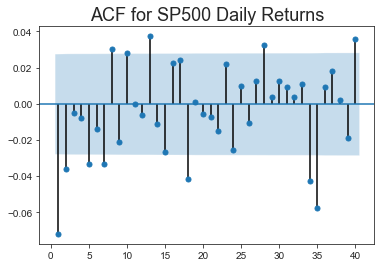

In [26]:
statsmodels.graphics.tsaplots.plot_acf(df.returns, zero=False, lags=40)
plt.title('ACF for SP500 Daily Returns', size=18)
plt.show()

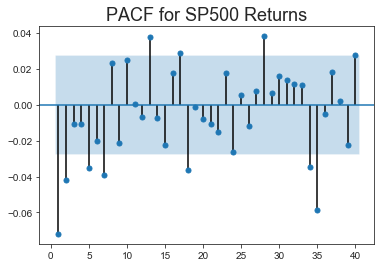

In [27]:
statsmodels.graphics.tsaplots.plot_pacf(df.returns, zero=False, lags=40)
plt.title('PACF for SP500 Returns', size=18)
plt.show()

# AR-Modelling Daily Returns

In [28]:
# AR(1)
model_ret_ar1 = sm.tsa.ARMA(df.returns, order=(1,0))
results_ar1 = model_ret_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               15050.414
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30094.827
Time:                        09:28:51   BIC                         -30075.264
Sample:                    01-10-1994   HQIC                        -30087.972
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      1.959      0.050   -1.05e-07       0.001
ar.L1.returns    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
# AR(2)
model_ret_ar2 = sm.tsa.ARMA(df.returns, order=(2,0))
results_ar2 = model_ret_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               15054.777
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30101.555
Time:                        09:28:51   BIC                         -30075.470
Sample:                    01-10-1994   HQIC                        -30092.414
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.042      0.041    1.26e-05       0.001
ar.L1.returns    -0.0749      0.014     -5.311      0.000      -0.103      -0.047
ar.L2.returns    -0.0417      0.014     -2.956      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8985           -0.2794
AR.2           -0.8987           +4.8154j            4.8985            0.2794
-----------------------------------------------------------------------------
"""

# Normalizing the Time Series Prices

In [30]:
df['norm'] = df.market_value/df.market_value[0]*100
df.head()

,market_value,returns,norm
date,,,
1994-01-10,475.27,0.011428,100.000000
1994-01-11,474.13,-0.002399,99.760136
1994-01-12,474.17,0.000084,99.768553
1994-01-13,472.47,-0.003585,99.410861
1994-01-14,474.91,0.005164,99.924254


# Test for Stationarity

In [31]:
sm.tsa.stattools.adfuller(df.norm)

(-1.7396871077371265,
 0.4107891338207882,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 24351.278699350325)

Normalizing prices does not make them stationary. It just improve comparability!

# Normalizing Returns

In [32]:
df['norm_ret'] = df.returns/df.returns[0]*100
df.head()

,market_value,returns,norm,norm_ret
date,,,,
1994-01-10,475.27,0.011428,100.000000,100.000000
1994-01-11,474.13,-0.002399,99.760136,-20.989187
1994-01-12,474.17,0.000084,99.768553,0.738233
1994-01-13,472.47,-0.003585,99.410861,-31.372275
1994-01-14,474.91,0.005164,99.924254,45.190459


In [33]:
sm.tsa.stattools.adfuller(df.norm_ret) # p = 0.0
# => Reject null. The data is still stationary!

(-17.034457190981186,
 8.280537020316944e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 60636.5822032878)

In [34]:
# AR(1)
norm_model_ret_ar1 = sm.tsa.ARMA(df.norm_ret, order=(1,0))
norm_results_ar1 = norm_model_ret_ar1.fit()
norm_results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -30515.434
Method:                       css-mle   S.D. of innovations            105.618
Date:                Fri, 27 Mar 2020   AIC                          61036.869
Time:                        09:28:53   BIC                          61056.432
Sample:                    01-10-1994   HQIC                         61043.724
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7249      1.391      1.959      0.050      -0.001       5.451
ar.L1.norm_ret    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
# AR(2)
norm_model_ret_ar2 = sm.tsa.ARMA(df.norm_ret, order=(2,0))
norm_results_ar2 = norm_model_ret_ar2.fit()
norm_results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -30511.071
Method:                       css-mle   S.D. of innovations            105.527
Date:                Fri, 27 Mar 2020   AIC                          61030.142
Time:                        09:28:53   BIC                          61056.226
Sample:                    01-10-1994   HQIC                         61039.282
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7240      1.334      2.042      0.041       0.110       5.338
ar.L1.norm_ret    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.norm_ret    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8986           -0.2794
AR.2           -0.8987           +4.8154j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

Apparently, normalizing the values does not affect model selection, only the magnitude of the parameters!

# Analysing the Residuals
## Residuals of Prices

In [58]:
# AR(3) for prices
ar3_prices = sm.tsa.ARMA(df.market_value, order=(3,0))
ar3_prices_results = ar3_prices.fit()
ar3_prices_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood              -20078.758
Method:                       css-mle   S.D. of innovations             13.199
Date:                Fri, 27 Mar 2020   AIC                          40167.516
Time:                        09:36:13   BIC                          40200.122
Sample:                    01-10-1994   HQIC                         40178.942
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1051.8396    258.102      4.075      0.000     545.970    1557.710
ar.L1.market_value     0.9277      0.014     68.170      0.000       0.901       0.954
ar.L2.market_value     0.0377      0.019      1.990      0.047       0.001       0.075
ar.L3.market_value     0.0341      0.014      2.419      0.016       0.006       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0521           -5.3086j            5.4119           -0.2811
AR.3           -1.0521           +5.3086j            5.4119            0.2811
-----------------------------------------------------------------------------
"""

In [59]:
df['res_prices'] = ar3_prices_results.resid

(-100, 100)

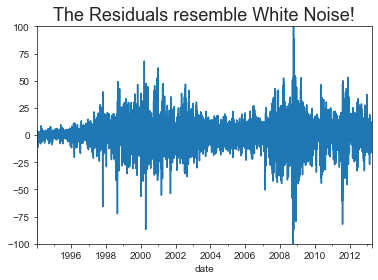

In [60]:
df.res_prices.plot()
plt.title('The Residuals resemble White Noise!', size=18)
plt.ylim((-100, 100))

In [61]:
sm.tsa.stattools.adfuller(df.res_prices) # p = 0.0
# => Reject null. The RESIDUALS OF PRICES are stationary!

(-16.376688438214156,
 2.776761646122117e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39896.64273321682)

## Residuals of Returns

In [65]:
# AR(2) for returns
ar2_returns = sm.tsa.ARMA(df.returns, order=(2,0))
ar2_returns_results = ar2_returns.fit()
ar2_returns_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               15054.777
Method:                       css-mle   S.D. of innovations              0.012
Date:                Fri, 27 Mar 2020   AIC                         -30101.555
Time:                        09:38:08   BIC                         -30075.470
Sample:                    01-10-1994   HQIC                        -30092.414
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.042      0.041    1.26e-05       0.001
ar.L1.returns    -0.0749      0.014     -5.311      0.000      -0.103      -0.047
ar.L2.returns    -0.0417      0.014     -2.956      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8985           -0.2794
AR.2           -0.8987           +4.8154j            4.8985            0.2794
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'The Residuals resemble White Noise!')

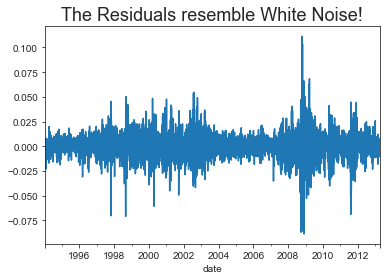

In [66]:
df['res_returns'] = ar2_returns_results.resid
df.res_returns.plot()
plt.title('The Residuals resemble White Noise!', size=18)

In [67]:
sm.tsa.stattools.adfuller(df.res_returns) # p = 0.0
# => Reject null. The RESIDUALS OF RETURNS are stationary!

(-16.96141750250081,
 9.30232235060446e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 -29896.16712074361)